# Monday Meeting Analyses

In [36]:
# Geostack

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import xdem

## Importing dems, extracting Terrain Roughness Index (TRI)

In [60]:
# Importing KSN dfs.

b_0_kn = pd.read_csv('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_0_reproj.tiff_knickpoints.csv', index_col = 0)
b_1_kn = pd.read_csv('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_1_reproj.tiff_knickpoints.csv', index_col = 0)

In [61]:
b_0_kn = gpd.GeoDataFrame(data=b_0_kn, geometry=gpd.points_from_xy(b_0_kn.x, b_0_kn.y), crs=rio.CRS.from_epsg(2283))
b_1_kn = gpd.GeoDataFrame(data=b_1_kn, geometry=gpd.points_from_xy(b_1_kn.x, b_1_kn.y), crs=rio.CRS.from_epsg(2283))

In [62]:
b_0_kn = b_0_kn.to_crs(rio.CRS.from_epsg(4326))
b_1_kn = b_1_kn.to_crs(rio.CRS.from_epsg(4326))

In [75]:
b_0_sorted = b_0_kn.sort_values(by='elevation', ascending= False)
b_1_sorted = b_1_kn.sort_values(by='elevation', ascending= False)

In [70]:
b_0_sorted

basin_key  col  nodeID  row  sign  source_key        chi   delta_ksn  \
77           0  137  234115  441     1          37  15.438570    1.421793   
75           0  157  226276  431    -1          37  14.171692 -143.573670   
71           0  163  213634  415    -1          41  13.911592  -24.944809   
128          0   56  371425  613     1          30  17.481504    6.403761   
123          0   68  356235  594    -1          30  16.372091  -21.022976   
..         ...  ...     ...  ...   ...         ...        ...         ...   
285          0  754  571956  936     1           0   0.583120    0.000000   
286          0  752  572683  938     1           0   0.569074    0.000000   
287          0  751  573045  939     1           0   0.562050    0.000000   
288          0  735  586072  977     1           0   0.006995    0.000000   
195          0  734  585770  976     1           0   0.000000   10.556708   

     delta_zseg  drainage_area   elevation  flow_distance           x  \
77     0.000000   1.375190e+07  1007.12805   112634.98000  11293863.0   
75     0.000000   1.802791e+07   979.52640   110399.04000  11295671.0   
71     0.000000   1.102114e+07   958.26130   109781.60000  11296214.0   
128    0.000000   1.842853e+07   955.78430   122074.71000  11286539.0   
123    0.000000   2.254102e+07   930.94510   119907.26000  11287624.0   
..          ...            ...         ...            ...         ...   
285    0.078140   2.932311e+09   165.04460    10637.07200  11349652.0   
286    0.078262   2.932548e+09   164.74036    10381.32400  11349471.0   
287    0.074890   2.932614e+09   164.60368    10253.45000  11349381.0   
288    0.101944   2.958499e+09   158.74623      127.87434  11347934.0   
195    0.000000   4.930033e+09   158.46886        0.00000  11347844.0   

             y                    geometry  
77   6613953.0  POINT (-79.15434 37.80839)  
75   6614857.5   POINT (-79.1481 37.81091)  
71   6616304.0   POINT (-79.14626 37.8149)  
128  6598401.0  POINT (-79.17929 37.76554)  
123  6600119.0  POINT (-79.17558 37.77028)  
..         ...                         ...  
285  6569195.0  POINT (-78.96047 37.68642)  
286  6569014.0   POINT (-78.9611 37.68592)  
287  6568923.5   POINT (-78.9614 37.68567)  
288  6565487.5  POINT (-78.96634 37.67622)  
195  6565578.0  POINT (-78.96666 37.67646)  

[290 rows x 15 columns]

Text(0.5, 1.0, "Massie's Mill TRI")

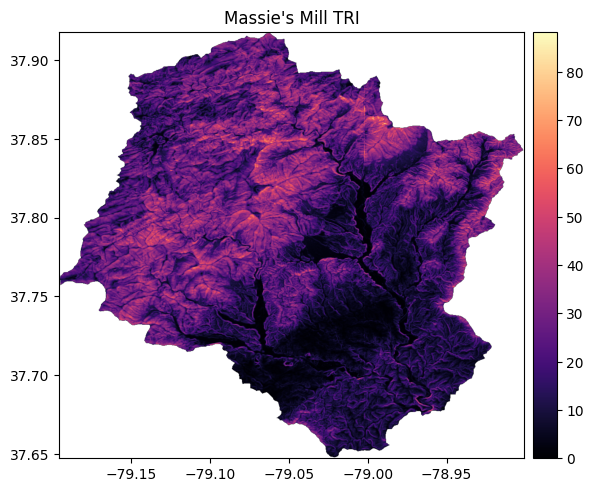

In [ ]:
# Importing to xdem for terrain ruggedness index (TRI) calculations.
m_dem = xdem.DEM('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_0.tiff')

# Gives me elevation difference for each pixel in a 3x3 window (90m x 90m)
m_tri = m_dem.terrain_ruggedness_index(window_size=3)

# Mapping.
m_tri.plot(cmap='magma')
plt.title("Massie's Mill TRI")

In [23]:
# Getting TRI values for each pixel.
tri_data = m_tri.data

# Ensure tri_data is a numpy array
tri_data = np.asarray(tri_data)

# Mask out no_data/nan values
tri_valid_mask = ~np.isnan(tri_data)
tri_valid_values = tri_data[tri_valid_mask]

# Calculate 10th percentile
percentile_10 = np.percentile(tri_valid_values, 10)

# Boolean mask: True if below 10th percentile and valid, False otherwise (including no_data)
TRI_bool_mask = np.where(tri_valid_mask & (tri_data < percentile_10), True, False)

# If you want to guarantee dtype is bool and no None values:
TRI_bool_mask = TRI_bool_mask.astype(bool)
TRI_bool_mask  # 2D boolean array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(974, 1062))

In [24]:
# Getting elevation values for each pixel.
dem_data = m_dem.data

dem_data = np.asarray(dem_data)

# Mask out no_data/nan values
dem_valid_mask = ~np.isnan(dem_data)
dem_valid_values = dem_data[dem_valid_mask]

# Calculate 90th percentile
dem_percentile_90 = np.percentile(dem_valid_values, 90)

# Boolean mask: True if above 90th percentile and valid, False otherwise (including no_data)
dem_bool_mask = np.where(dem_valid_mask & (dem_data > dem_percentile_90), True, False)
dem_bool_mask  # 2D boolean array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(974, 1062))

In [25]:
nrows, ncols = m_tri.data.shape
rows, cols = np.indices((nrows, ncols))
xs, ys = m_tri.transform * (cols, rows)
xs, ys

(array([[-79.19583253, -79.19555475, -79.19527697, ..., -78.90166586,
         -78.90138808, -78.9011103 ],
        [-79.19583253, -79.19555475, -79.19527697, ..., -78.90166586,
         -78.90138808, -78.9011103 ],
        [-79.19583253, -79.19555475, -79.19527697, ..., -78.90166586,
         -78.90138808, -78.9011103 ],
        ...,
        [-79.19583253, -79.19555475, -79.19527697, ..., -78.90166586,
         -78.90138808, -78.9011103 ],
        [-79.19583253, -79.19555475, -79.19527697, ..., -78.90166586,
         -78.90138808, -78.9011103 ],
        [-79.19583253, -79.19555475, -79.19527697, ..., -78.90166586,
         -78.90138808, -78.9011103 ]], shape=(974, 1062)),
 array([[37.91777741, 37.91777741, 37.91777741, ..., 37.91777741,
         37.91777741, 37.91777741],
        [37.91749963, 37.91749963, 37.91749963, ..., 37.91749963,
         37.91749963, 37.91749963],
        [37.91722185, 37.91722185, 37.91722185, ..., 37.91722185,
         37.91722185, 37.91722185],
        ...,

In [26]:
df = pd.DataFrame(data=[xs.flatten(), ys.flatten(), TRI_bool_mask.flatten(), dem_bool_mask.flatten()]).T

<Axes: xlabel='0', ylabel='1'>

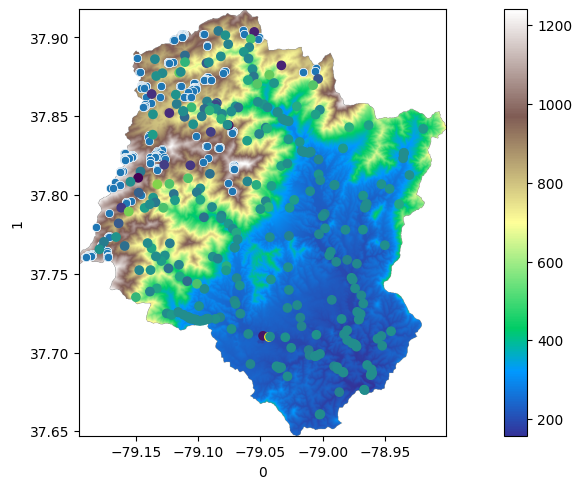

In [74]:
fig, ax = plt.subplots()
m_dem.plot(cmap='terrain', ax=ax)
sns.scatterplot(data=df[(df[2]== True) & (df[3] == True)], x=0, y=1, ax=ax)
b_0_kn.plot(c=b_0_kn['delta_ksn'], ax=ax)

Text(0.5, 1.0, 'Smoot TRI')

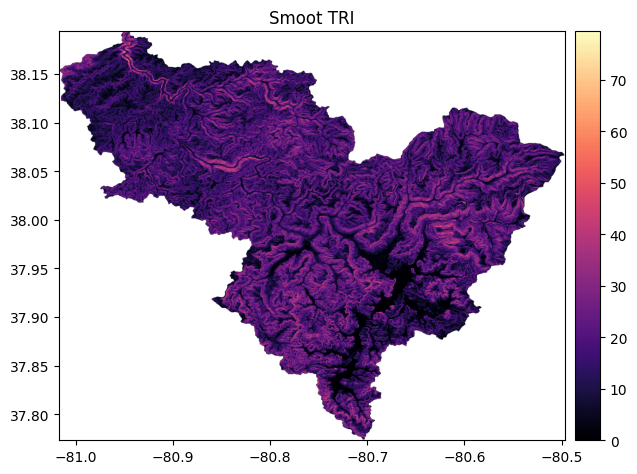

In [28]:
smoot_dem = xdem.DEM('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_1.tiff')
s_tri = smoot_dem.terrain_ruggedness_index()
s_tri.plot(cmap='magma')
plt.title("Smoot TRI")

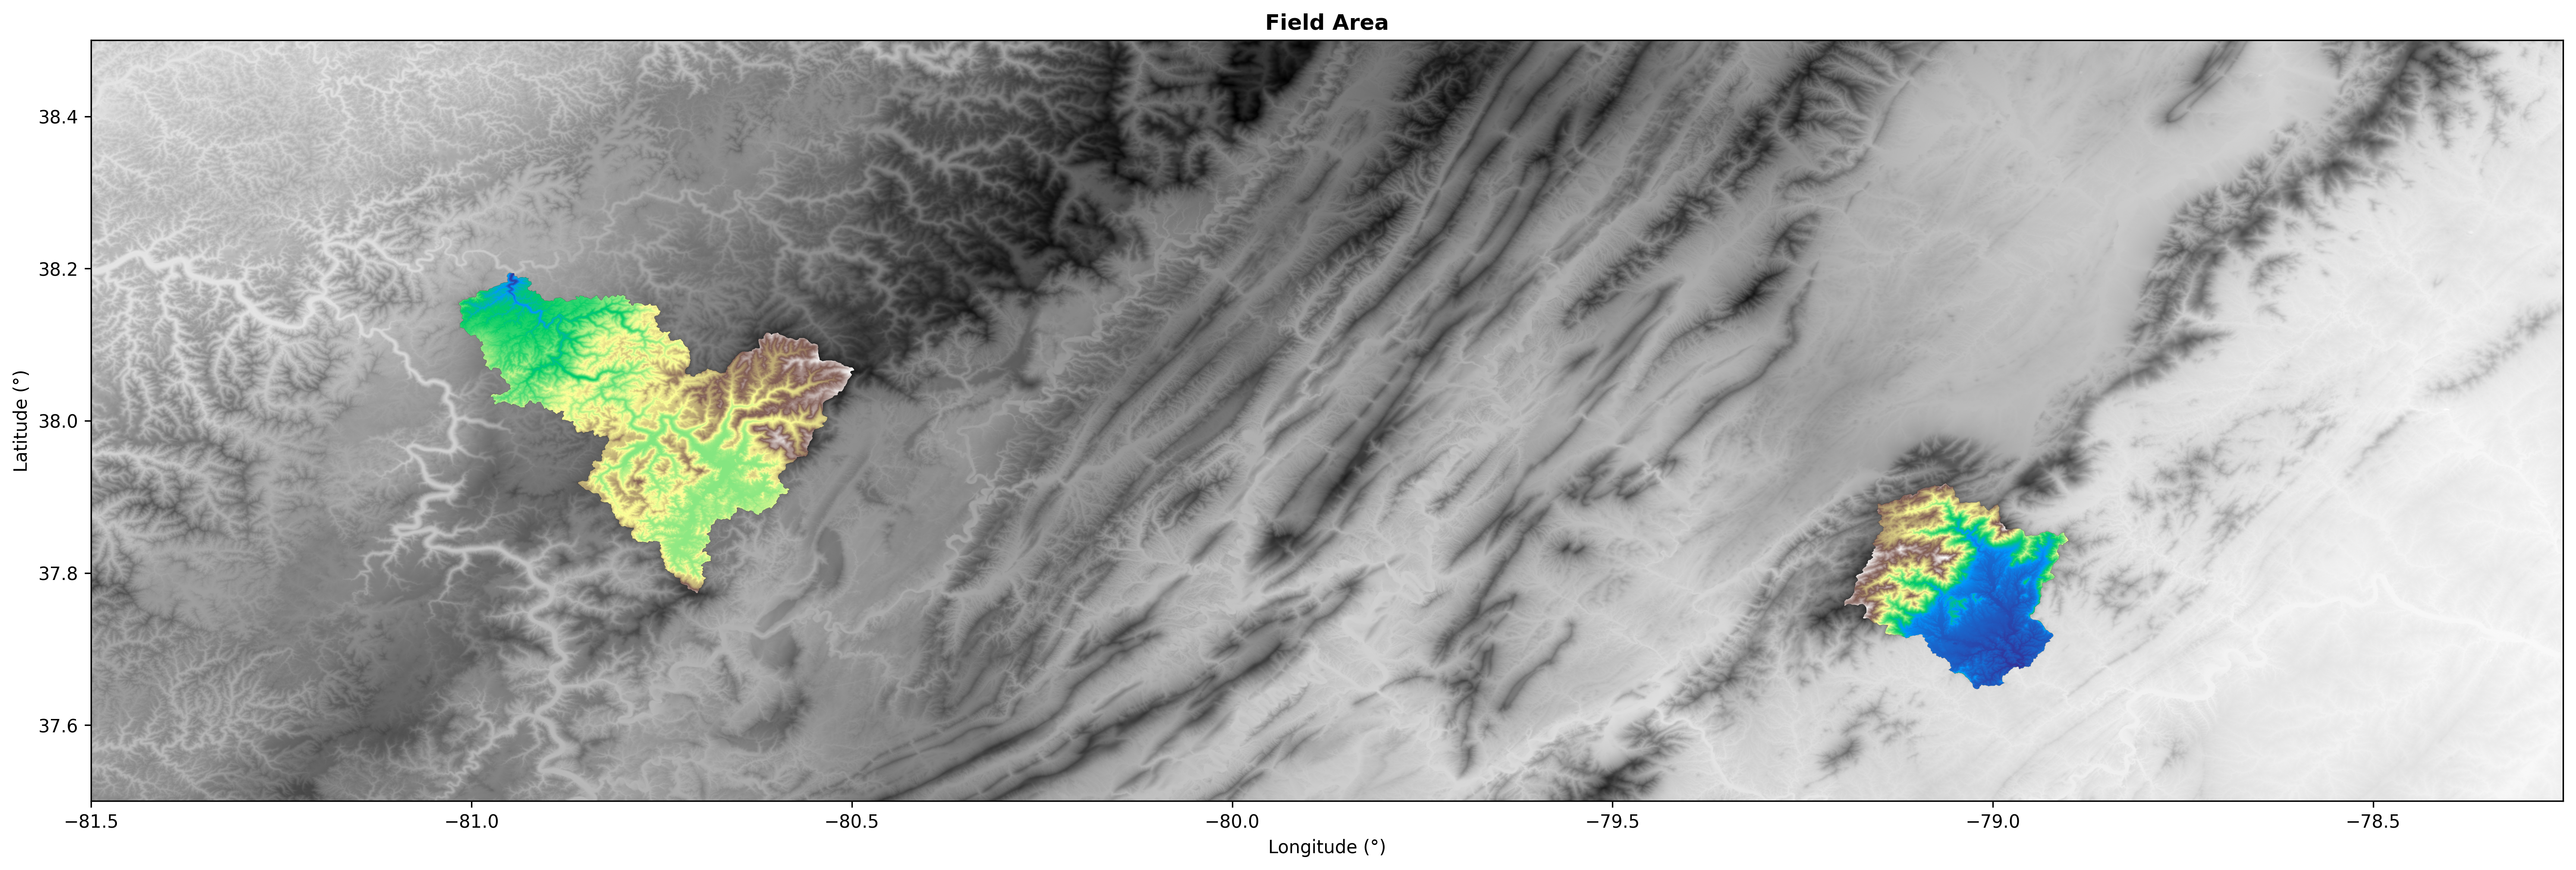

In [35]:
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
basemap = show(rio.open('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/field_area.tiff'), ax=ax, title="Field Area", cmap='binary', with_bounds=True)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
b_0_map = m_dem.plot(ax=ax, cmap='terrain', add_cbar=False)
b_1_map = smoot_dem.plot(ax=ax, cmap='terrain', add_cbar=False)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Latitude (°)')
ax.set_xlabel('Longitude (°)')
plt.show()